In [19]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
from astropy.convolution import convolve, Box1DKernel
from scipy.interpolate import interp1d

import astropy.units as u
from astropy import time, coordinates as coord
import astropy.constants as const
from astropy.modeling import models, fitting
from astropy.coordinates import SkyCoord
from matplotlib.gridspec import GridSpec
from datetime import datetime


#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

In [20]:
path = '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/'

In [21]:
x1ds = np.hstack((glob.glob('{}*0_x1d.fits'.format(path)), glob.glob('{}*sx1.fits'.format(path)), glob.glob('{}*x1dsum.fits'.format(path))))
x1ds


array(['/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei103010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15020_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15030_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei104010_x1d.fits',
       '/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16040_sx1.fits'],
      dtype='<U66')

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei103010_x1d.fits
G140M
403.75333


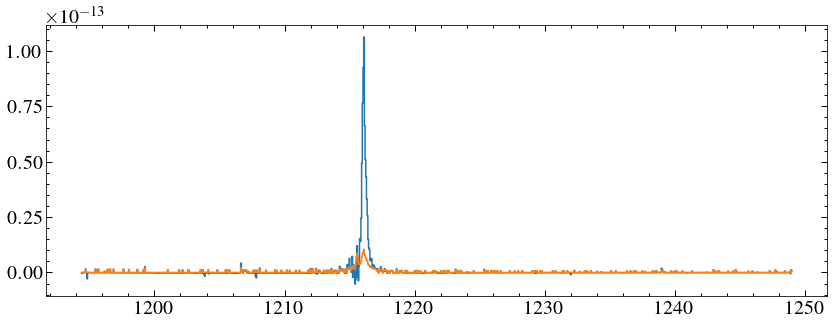

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14010_x1d.fits
G140L
514.2295


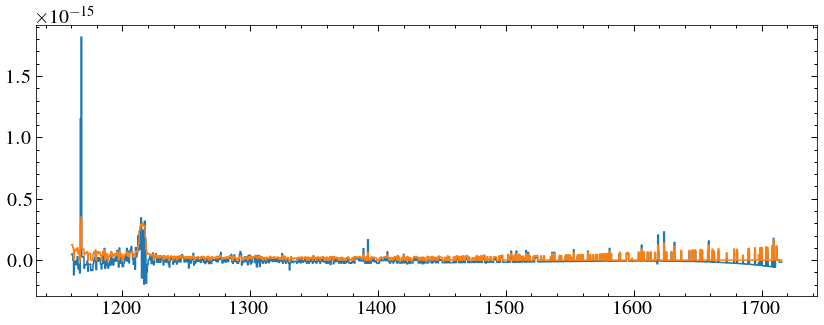

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14020_x1d.fits
G140L
514.3294


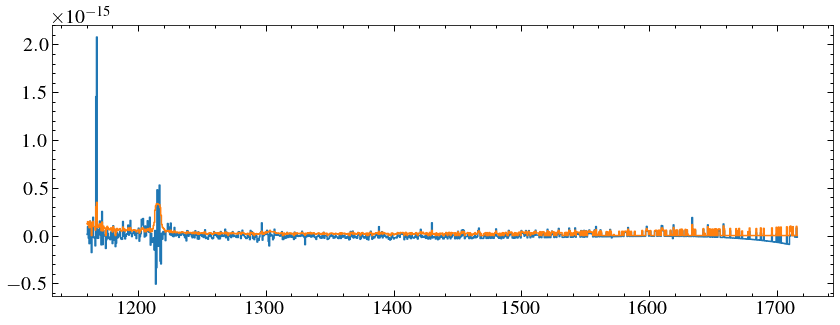

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14030_x1d.fits
G140L
514.2828


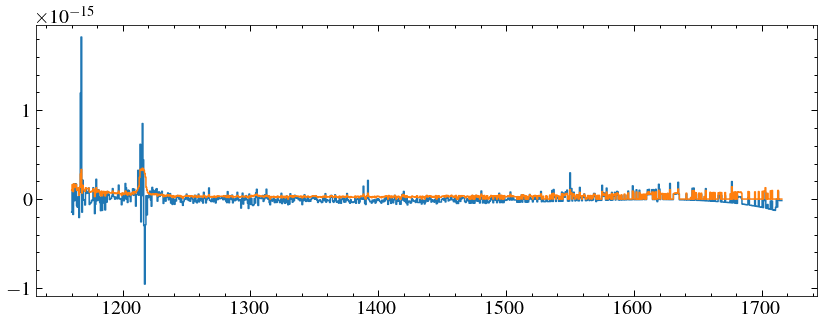

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15010_x1d.fits
G140L
143.5563


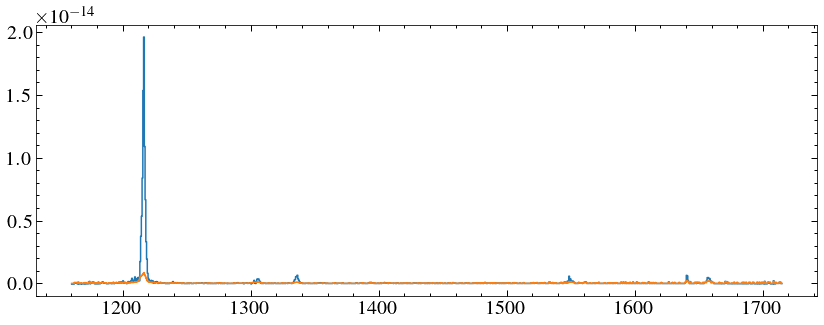

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16020_x1d.fits
G140M
153.23633


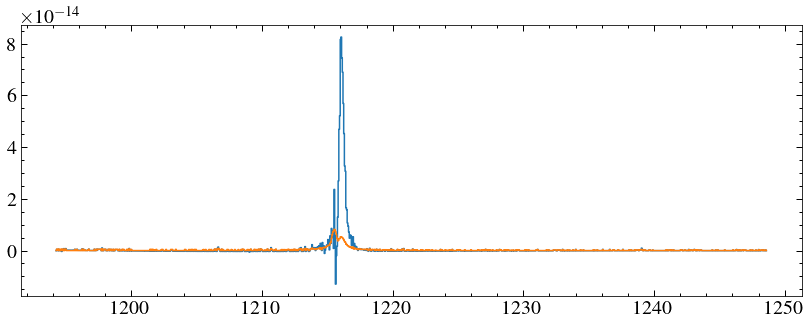

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16030_x1d.fits
G230L
547.3228


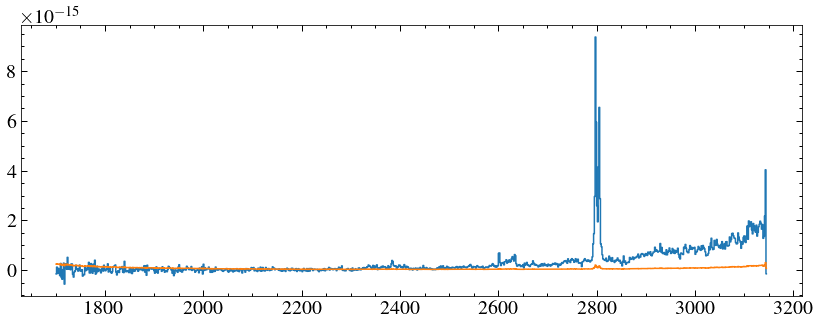

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15020_x1d.fits
G140L
143.713


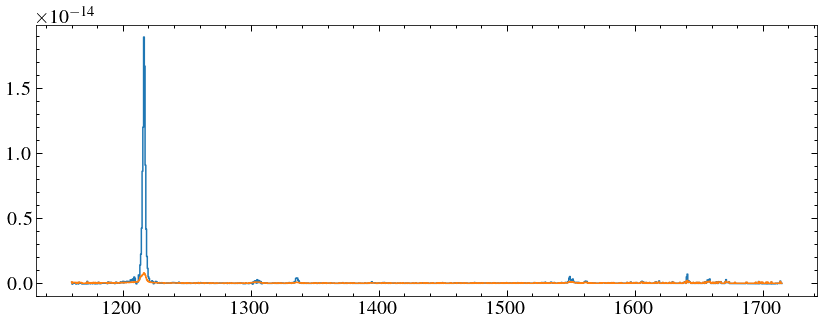

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15030_x1d.fits
G230L
535.2361


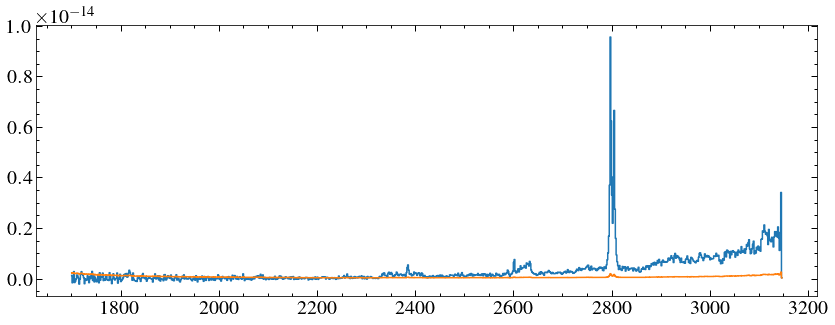

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16010_x1d.fits
G140M
152.78192


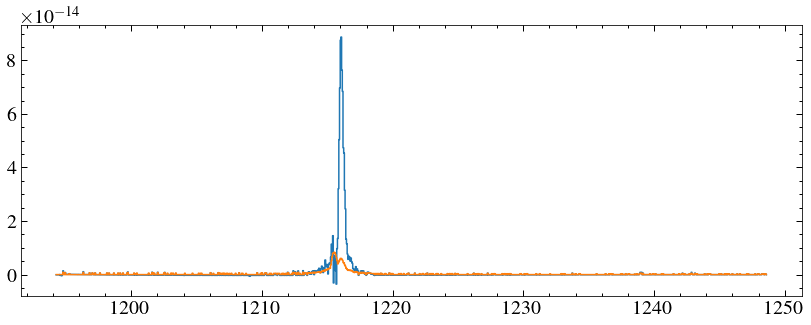

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei104010_x1d.fits
G140M
405.91272


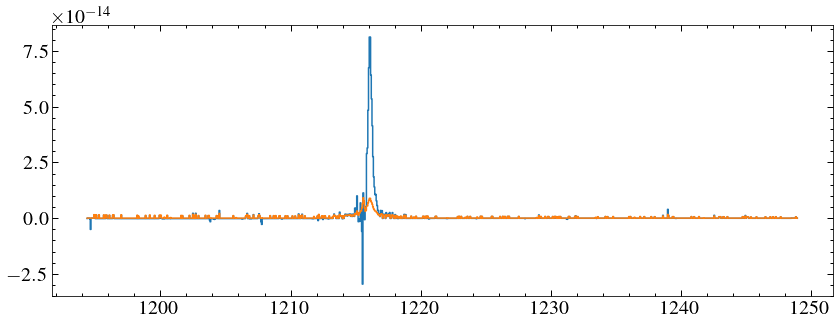

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16040_sx1.fits
G430L
894.20105


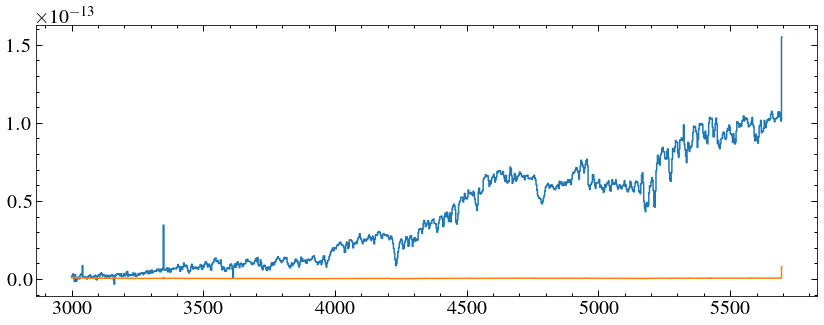

In [22]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    plt.step(w, e, where='mid')
    plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16030_x1d.fits
G230L
547.3228
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15030_x1d.fits
G230L
535.2361


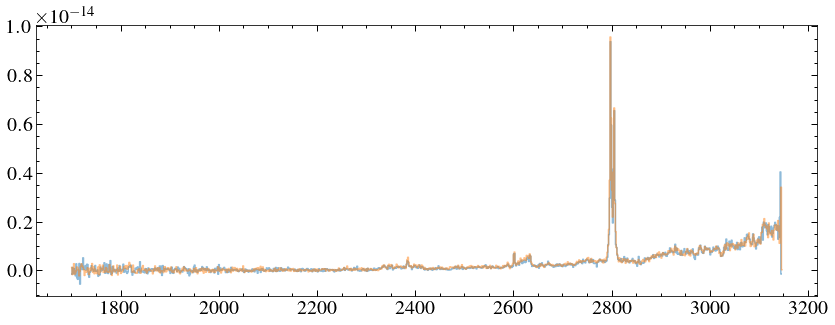

In [23]:
for x in x1ds:
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating == 'G230L':
        print(x)
        print(grating)
        
        data = fits.getdata(x, 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        if grating in ['G140M', 'G140L']:
            mask = (w > 1160)
        if grating =='G230L':
            mask = (w > 1700)
        if grating =='G430L':
            mask = (w > 3000)

        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', alpha=0.5)
    # plt.step(w, e, where='mid')
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei103010_x1d.fits
G140M
403.75333
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16020_x1d.fits
G140M
153.23633
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16010_x1d.fits
G140M
152.78192
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei104010_x1d.fits
G140M
405.91272


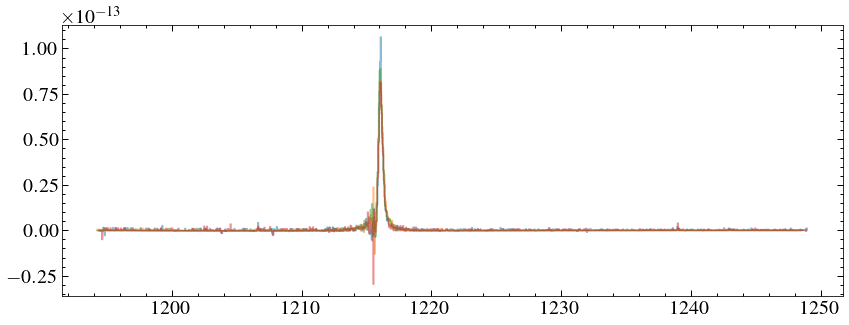

In [24]:
for x in x1ds:
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    if grating == 'G140M':
        print(x)
        print(grating)
        
        data = fits.getdata(x, 1)[0]
        print(data['A2Center'])
        w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
        if grating in ['G140M', 'G140L']:
            mask = (w > 1160)
        if grating =='G230L':
            mask = (w > 1700)
        if grating =='G430L':
            mask = (w > 3000)

        w, f, e = w[mask], f[mask], e[mask]
        plt.step(w, f, where='mid', alpha=0.5)
    # plt.step(w, e, where='mid')
    # plt.show()
    

/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei103010_x1d.fits
G140M
403.75333
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14010_x1d.fits
G140L
514.2295
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14020_x1d.fits
G140L
514.3294
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo14030_x1d.fits
G140L
514.2828
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15010_x1d.fits
G140L
143.5563
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16020_x1d.fits
G140M
153.23633
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16030_x1d.fits
G230L
547.3228
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15020_x1d.fits
G140L
143.713
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo15030_x1d.fits
G230L
535.2361
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16010_x1d.fits
G140M
152.78192
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oei104010_x1d.fits
G140M
405.91272
/media/david/2tb_ext_hd/hddata/meats/hst/toi776/oeoo16040_sx1.fits
G430L
894.20105


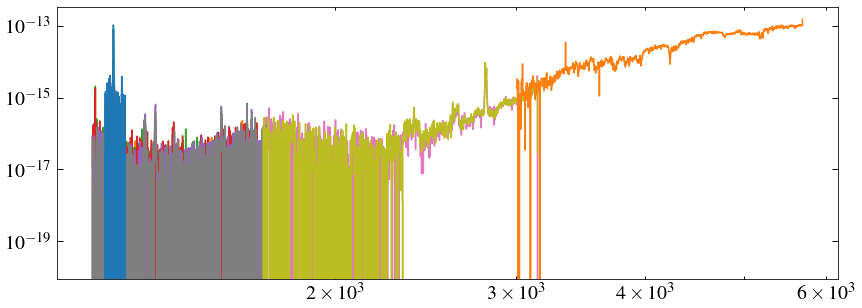

In [25]:
for x in x1ds:
    print(x)
    grating = fits.getheader(x, 0)['OPT_ELEM'] 
    print(grating)
    data = fits.getdata(x, 1)[0]
    print(data['A2Center'])
    w, f, e= data['WAVELENGTH'], data['FLUX'], data['ERROR']
    if grating in ['G140M', 'G140L']:
        mask = (w > 1160)
    if grating =='G230L':
        mask = (w > 1700)
    if grating =='G430L':
        mask = (w > 3000)
    
    w, f, e = w[mask], f[mask], e[mask]
    plt.step(w, f, where='mid')
    # plt.step(w, e, where='mid')
    # plt.show()
    plt.xscale('log')
    plt.yscale('log')
    